In [2]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
df = pd.read_csv("C:/Users/sudarshan uc/OneDrive/Desktop/Salary Prediction of Data Professions.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


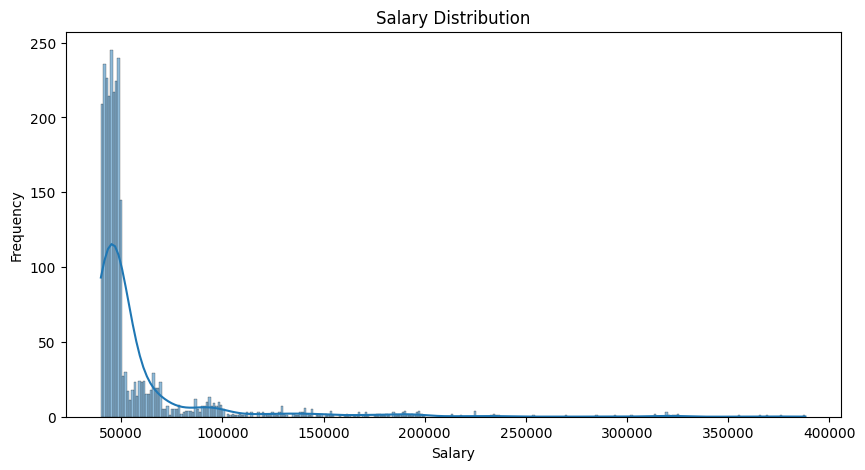

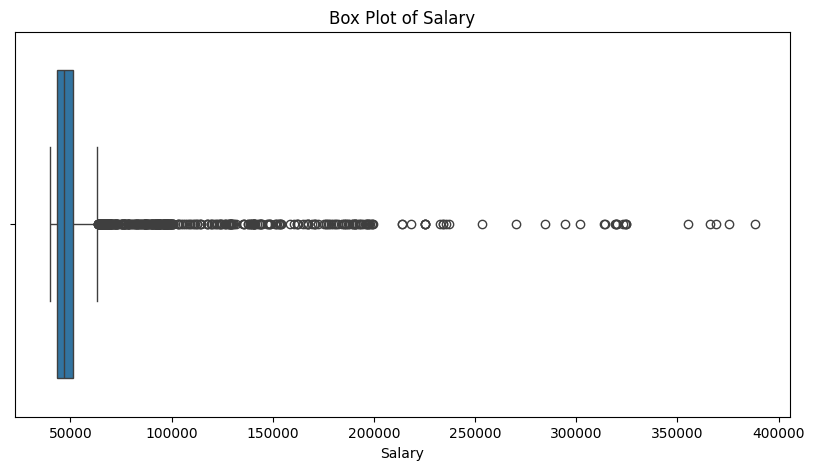

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['SALARY'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()
print()
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['SALARY'])
plt.title('Box Plot of Salary')
plt.xlabel('Salary')
plt.show()

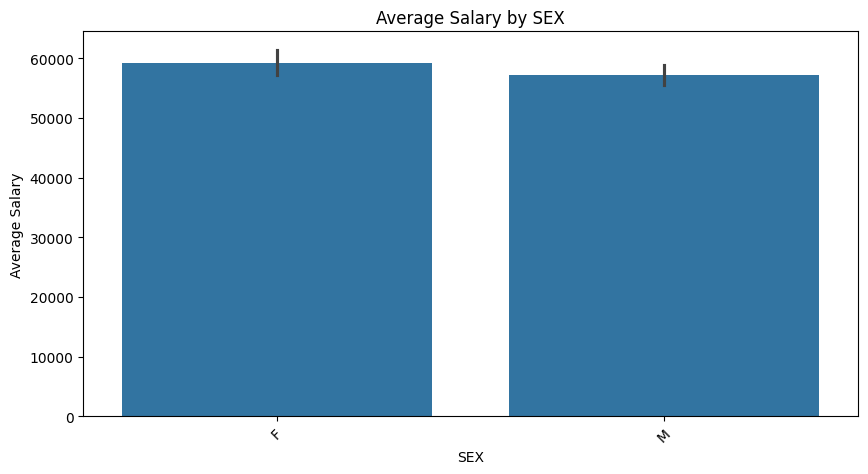

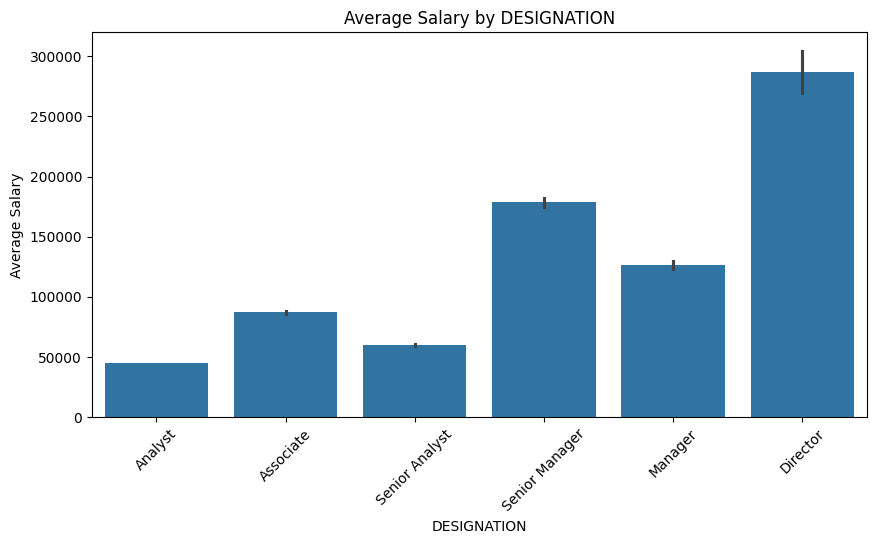

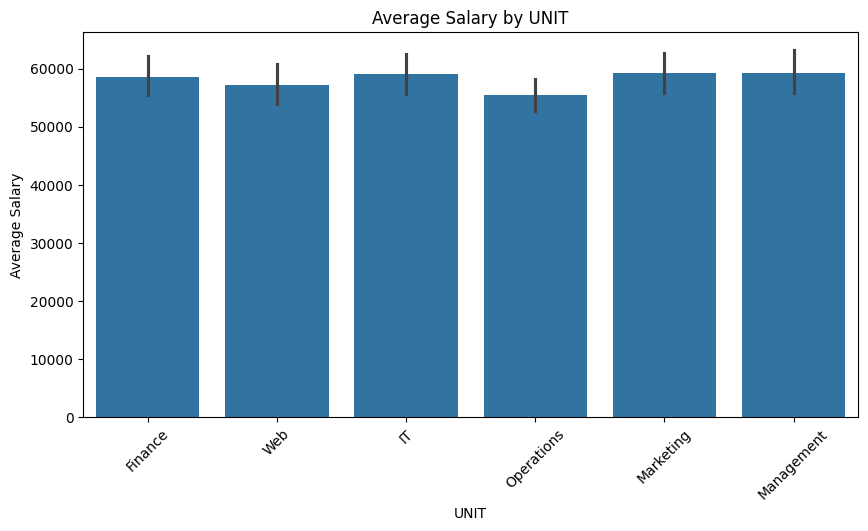

In [5]:
categorical_features = ['SEX','DESIGNATION', 'UNIT']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df[feature], y=df['SALARY'])
    plt.title(f'Average Salary by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.show()
    print()

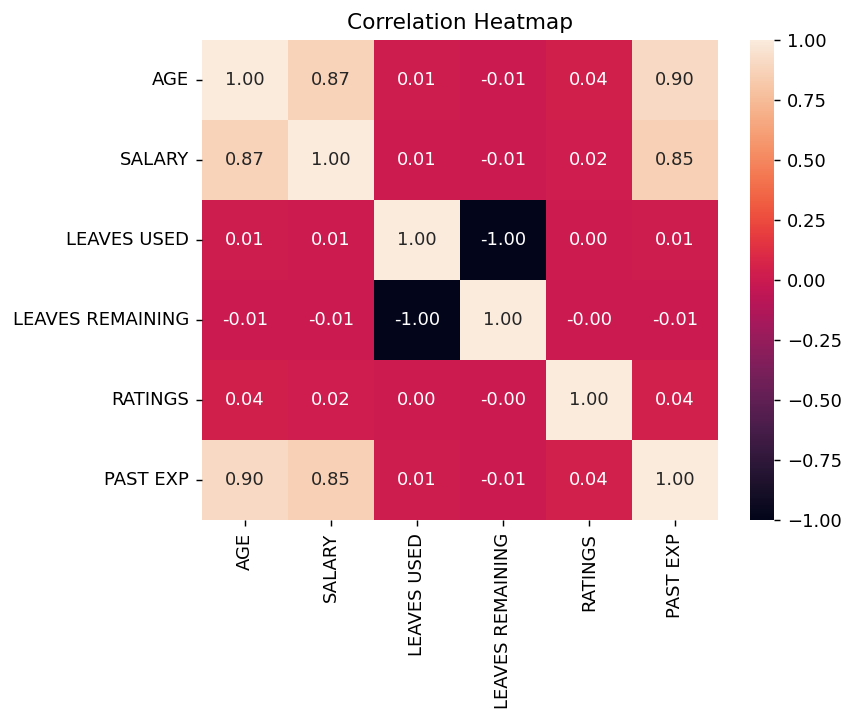

In [6]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numerical columns
corr = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Convert 'DOJ' and 'CURRENT DATE' to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

# Calculate tenure in days, then convert to years
df['TENURE'] = (df['CURRENT DATE'] - df['DOJ']).dt.days // 365.25
df['TOTAL_EXP'] = df['PAST EXP'] + df['TENURE']


df = df.drop(columns=['DOJ', 'CURRENT DATE','FIRST NAME','LAST NAME','LEAVES REMAINING','PAST EXP','TENURE','AGE','LEAVES USED'])
df =df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2472 entries, 0 to 2638
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SEX          2472 non-null   object 
 1   DESIGNATION  2472 non-null   object 
 2   SALARY       2472 non-null   int64  
 3   UNIT         2472 non-null   object 
 4   RATINGS      2472 non-null   float64
 5   TOTAL_EXP    2472 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 135.2+ KB


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["SALARY"]),df["SALARY"], test_size=0.2, random_state=42)

In [9]:
s1 = ColumnTransformer([
    ('ord', OrdinalEncoder(categories=[['Analyst', 'Associate', 'Senior Analyst', 'Manager', 'Senior Manager', 'Director']]), ['DESIGNATION']),
    ('onehot', OneHotEncoder(), ['UNIT', 'SEX'])
], remainder='passthrough')

s3 = ColumnTransformer([
    ('Scale', StandardScaler(), slice(0,122))
], remainder="passthrough")
# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors Regression": KNeighborsRegressor(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Fit and evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ("s1", s1),
        ("s2", model),
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R2 Score: {r2}")

Linear Regression R2 Score: 0.8057698676237133
Logistic Regression R2 Score: 0.7637713072536131
K-Nearest Neighbors Regression R2 Score: 0.8887923757193172
Decision Tree Regression R2 Score: 0.9434282379049883
Random Forest Regression R2 Score: 0.9380611744075972
Gradient Boosting Regression R2 Score: 0.9322794102088138


In [10]:
s1 = ColumnTransformer([
    ('ord', OrdinalEncoder(categories=[['Analyst', 'Associate', 'Senior Analyst', 'Manager', 'Senior Manager', 'Director']]), ['DESIGNATION']),
    ('onehot', OneHotEncoder(), ['UNIT', 'SEX'])
], remainder='passthrough')

# Define the RandomForestRegressor with the best hyperparameters
s2 = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=4
)

# Create a pipeline with preprocessing and the model
model = Pipeline([
    ("s1", s1),
    ("s2", s2),
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)

R2 Score: 0.9470240400752409


In [12]:
# Function to preprocess input data
def preprocess_input(df):
    # Preprocess input data here (e.g., encoding categorical variables, transforming date features)
    # Convert 'DOJ' and 'CURRENT DATE' to datetime
    df['DOJ'] = pd.to_datetime(df['DOJ'])
    df['CURRENT DATE'] = pd.to_datetime('2016-07-01')

    # Calculate tenure in days, then convert to years
    df['TENURE'] = (df['CURRENT DATE'] - df['DOJ']).dt.days // 365.25
    df['TOTAL_EXP'] = df['PAST_EXP'] + df['TENURE']
    df = df.drop(columns=['DOJ', 'CURRENT DATE', 'NAME', 'PAST_EXP', 'TENURE', 'AGE'])
    total_experience=int(df['TOTAL_EXP'][0]) 
    # Provide salary increase recommendations based on total experience and rating
    if total_experience >= 5 :
        recommendation = "Your performance and experience suggest that you're well-positioned for a salary increase. Consider discussing this with your manager during your next performance review."
    elif total_experience >= 3 :
        recommendation = "You've gained valuable experience and have a solid performance rating. It might be a good time to explore opportunities for advancement within the company or discuss a salary review with your manager."
    else:
        recommendation = "Focus on enhancing your skills, gaining more experience, and improving your performance to increase your chances of a salary raise in the future."

    return df,recommendation

# Function to make prediction
def predict_salary(data):
    preprocessed_data,rec = preprocess_input(data)

    salary = model.predict(preprocessed_data)
    return salary,rec

# Terminal app
def main():
    print("Salary Prediction App")

#     # Input fields
#     name = input('Name: ')
#     age = int(input('Age: '))
#     gender = input('Gender (M/F): ')
#     designation = input('Designation (Analyst, Associate, Senior Analyst, Manager, Senior Manager, Director): ')
#     unit = input('Unit (Finance, Web, IT, Operations, Management, Marketing): ')
#     past_experience = float(input('Past Experience: '))
#     rating = float(input('Rating (0.0 - 5.0): '))
#     date_of_join = input('Date of Join (YYYY-MM-DD): ')


    input_data = pd.DataFrame({
        'NAME': ["AI"],
        'AGE': [40],
        'SEX': ["M"],
        'DESIGNATION': ["Director"],
        'UNIT': ["IT"],
        'PAST_EXP': [15],
        'RATINGS': [5.0],
        'DOJ': ["2014-09-30"]
    })

    salary_prediction,rec = predict_salary(input_data)
    print(f'Predicted Salary: {salary_prediction[0]}')
    print(f'Recommendation: {rec}')

if __name__ == '__main__':
    main()

Salary Prediction App
Predicted Salary: 265162.2231856754
Recommendation: Your performance and experience suggest that you're well-positioned for a salary increase. Consider discussing this with your manager during your next performance review.
